In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
from sklearn.datasets import make_classification

In [65]:
X, Y = make_classification(n_samples=1000,n_classes=2,n_clusters_per_class=1,n_features=2,n_informative=2,n_redundant=0,
                   random_state=3,class_sep=2)

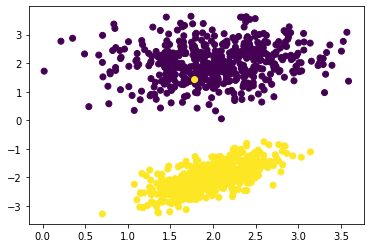

In [66]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

In [67]:
Y[Y == 0] = -1
Y = Y.reshape((-1,1))

In [68]:
print(X.shape)
print(Y.shape) 

(1000, 2)
(1000, 1)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [70]:
class SVM:
    def __init__(self, c = 1.0):
        self.c = c
        self.W = None
        self.b = 0
    
    def hinge_loss(self, X, Y):
        W = self.W
        b = self.b
        c = self.c
        Y_ = X.dot(W) + b
        Y_Y_val = 1 - Y*Y_
        T_val = self.T(X, Y).reshape((-1,))
        Y_Y_val[T_val >= 1] = 0
        ans = self.c*Y_Y_val.sum()
        return W.T.dot(W)[0,0] + ans
    
    def T(self, X, Y):
        W = self.W
        b = self.b
        c = self.c
        return Y*(X.dot(W) + b)
    
    def deltaW(self, X, Y):
        W = self.W
        b = self.b
        c = self.c
        grad = np.array(self.W)
        T_val = self.T(X, Y).reshape((-1,))
        X_Y = (-c*X*Y)
        X_Y[T_val >= 1] = 0
        X_Y = X_Y.sum(axis = 0).reshape((-1,1))
        grad += (X_Y)
        return grad
    
    def deltaB(self, X, Y):
        c = self.c
        grad = -c*Y
        T_val = self.T(X, Y).reshape((-1,))
        grad[T_val >= 1] = 0
        return grad.sum()
    
    def mini_batch_descent(self, X, Y, lr, batch_size):
        for i in range(0, X.shape[0], batch_size):
            st = i 
            end = min(i+batch_size, X.shape[0]-1)
            X_ = X[st:end+1, :]
            Y_ = Y[st:end+1, :]
            self.b -= lr*self.deltaB(X_, Y_)
            self.W -= lr*self.deltaW(X_, Y_)
        return
    
    def shuffle_X_Y(self, X, Y):
        data = np.append(X, Y, axis = 1)
        np.random.shuffle(data)
        X, Y = data[:, :-1], data[:, -1].reshape((-1,1))
        return X, Y
    
    def fit(self, X, Y, itrs = 100, lr = 0.0001, batch_size = 100):
        print(self.c)
        m, n = X.shape
        loss_array = []
        self.b = 0
        self.W = np.zeros((n, 1))
        for i in range(itrs):
            X, Y = self.shuffle_X_Y(X, Y)
            self.mini_batch_descent(X, Y, lr, batch_size)
            loss_array.append(self.hinge_loss(X, Y))
        return loss_array
    
    def score(self, X_test, Y_test):
        Y_p = X_test.dot(self.W) + self.b
        Y_p[Y_p < 0] = -1
        Y_p[Y_p > 0] = 1
        return ((Y_p == Y_test).sum()/Y_test.shape[0]) * 100

10000.0


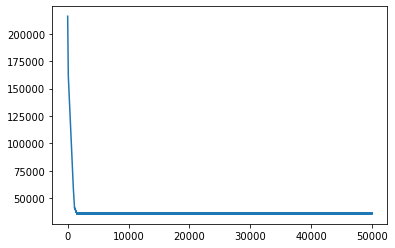

In [71]:
model_1 = SVM(c = 10000.0)
arr = model_1.fit(X_train, Y_train, itrs = 50000, lr = 0.000001, batch_size=5000)
plt.plot(arr)
plt.show()

1.0


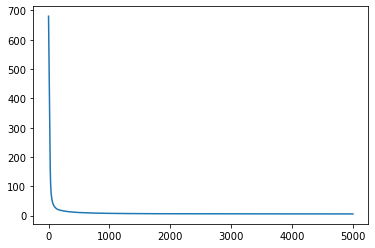

In [72]:
model_2 = SVM(c = 1.0)
arr = model_2.fit(X_train, Y_train, itrs = 5000, lr = 0.00001, batch_size=1000)
plt.plot(arr)
plt.show()

In [73]:
x1 = np.linspace(0,3,1000)

In [74]:
w1_1 = model_1.W[0][0]
w1_2 = model_1.W[1][0]
w2_1 = model_2.W[0][0]
w2_2 = model_2.W[1][0]

In [75]:
x2_1 = (-w1_1*x1 - model_1.b)/w1_2
x2_2 = (-w2_1*x1 - model_2.b)/w2_2


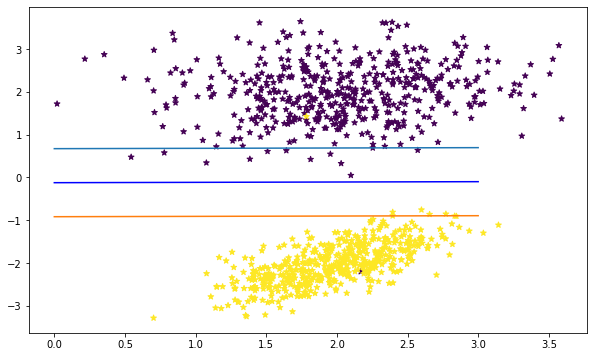

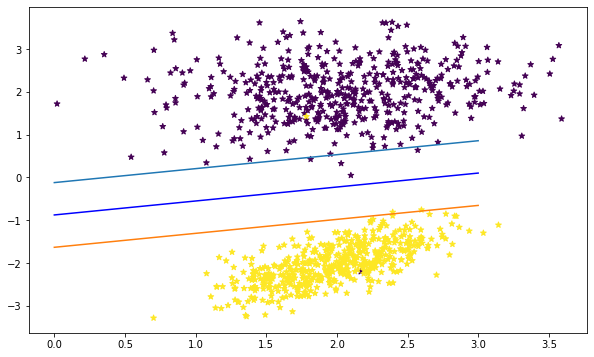

In [76]:
plt.figure(figsize = (10,6))
plt.plot(x1, x2_2, color = "blue")
plt.plot(x1, (x2_2*w2_2 - 1)/w2_2)
plt.plot(x1, (x2_2*w2_2 + 1)/w2_2)
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '*')
plt.show()

plt.figure(figsize = (10,6))
plt.plot(x1, x2_1, color = "blue")
plt.plot(x1, (x2_1*w1_2 - 1)/w1_2)
plt.plot(x1, (x2_1*w1_2 + 1)/w1_2)
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '*')
plt.show()

In [77]:
print(model_1.score(X_train, Y_train))
print(model_1.score(X_test, Y_test))

99.85714285714286
99.66666666666667


In [78]:
print(model_2.score(X_train, Y_train))
print(model_2.score(X_test, Y_test))

99.85714285714286
99.66666666666667


In [79]:
print(model_1.W, model_1.b)
print(model_2.W, model_2.b)

[[ 0.43143404]
 [-1.32300176]] -1.1600000000000008
[[ 0.00994889]
 [-1.25803047]] -0.15483999999999984
